In [2]:
import pandas as pd
import numpy as np

In [3]:
shipping_companies_details_data = pd.read_csv("data/shipping_companies_details.csv", encoding='utf-8')
train_2_pr_data = pd.read_csv("data/train_2_pr.csv", encoding='utf-8', index_col=0)
testdata = pd.read_csv("data/test_2.csv", encoding='utf-8', index_col=0)
# shipping_companies_details_1_data
train_2_pr_data.head()


,shipment_id,send_timestamp,pick_up_point,drop_off_point,source_country,destination_country,freight_cost,gross_weight,shipment_charges,shipment_mode,shipping_company,selected,shipping_time
0,S000720,2019/6/8 7:17,A,Y,GB,IN,88.61,355.0,0.75,Air,SC3,Y,5.00741
1,S000725,2019/7/12 15:23,A,Y,GB,IN,85.65,105.0,0.90,Ocean,SC1,Y,21.41215
2,S000736,2019/10/4 14:23,A,Y,GB,IN,86.22,100.0,0.75,Air,SC3,Y,5.33692
3,S000738,2020/1/7 9:19,A,Y,GB,IN,94.43,1071.0,1.05,Air,SC2,Y,5.14792
4,S000739,2020/4/11 6:36,A,Y,GB,IN,94.24,2007.0,0.75,Air,SC3,Y,5.03067


In [4]:
# train_2_pr_data.duplicated()  #以所有列标签，查看是否存在的重复值
# # shipping_companies_details_1_data.isnull().sum()   #统计缺失值数量
# # train_2_pr_data.isnull().sum()   #统计缺失值数量
# shipping_companies_details_data.info() #缺失值
# train_2_pr_data.info()

# train_2_pr_data.describe()#描述性统计的信息

In [5]:
#删除冗余数据
shipping_companies_details_data.drop(['source_country'], 1, inplace=True)
# train_2_pr_data.drop(['source_country'], 1, inplace=True) 

In [6]:
# train_data = train_2_pr_data
#通过货物最终相同的 装运的固定成本  进行合并的连接键
train_data = pd.merge(train_2_pr_data,shipping_companies_details_data, on=['shipment_charges'])
test_data = pd.merge(testdata,shipping_companies_details_data, on=['shipment_charges'])
test_data.drop(['pick_up_point_x','pick_up_point_y','drop_off_point_x','destination_country_y','drop_off_point_y','shipment_mode_y','source_country','selected','shipping_company_y'], 1, inplace=True)
# train_data
# test_data

In [7]:
#因为存在某个列的每行数据都相同，删除合并后的数据集中的冗余数据,
train_data.drop(['pick_up_point_x','pick_up_point_y','drop_off_point_x','destination_country_y','drop_off_point_y','shipment_mode_y','source_country','selected','shipping_company_y'], 1, inplace=True)
train_data.to_csv('train_data.csv')

### 异常值处理
查看整体数据类型以及数据缺失情况

观察数据的描述性统计的信息

In [8]:
train_data.duplicated()  #以所有列标签，查看是否存在的重复值
train_data.info() #缺失值

train_data.describe()#描述性统计的信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5113
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   shipment_id            5114 non-null   object 
 1   send_timestamp         5114 non-null   object 
 2   destination_country_x  5114 non-null   object 
 3   freight_cost           5114 non-null   float64
 4   gross_weight           5114 non-null   float64
 5   shipment_charges       5114 non-null   float64
 6   shipment_mode_x        5114 non-null   object 
 7   shipping_company_x     5114 non-null   object 
 8   shipping_time          5114 non-null   float64
 9   cut_off_time           5114 non-null   object 
 10  tat                    5114 non-null   object 
 11  processing_days        5114 non-null   object 
 12  min_cs                 5114 non-null   int64  
 13  max_cs                 5114 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 599.3+ 

,freight_cost,gross_weight,shipment_charges,shipping_time,min_cs,max_cs
count,5114.000000,5114.000000,5114.000000,5114.000000,5114.000000,5.114000e+03
mean,91.200923,954.074099,0.871732,12.641822,97.096206,1.388991e+06
std,5.154340,1266.102859,0.127972,10.273164,11.695487,1.285432e+06
min,82.885600,5.000000,0.562500,5.000000,50.000000,2.000000e+05
25%,87.750000,225.000000,0.750000,5.199910,100.000000,2.000000e+05
50%,90.750000,505.000000,0.900000,5.405150,100.000000,2.000000e+05
75%,92.837500,1100.000000,0.900000,19.644270,100.000000,2.500000e+06
max,115.620000,10000.000000,1.125000,57.249650,100.000000,4.000000e+06


In [9]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib
matplotlib.matplotlib_fname()
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shipping_time'>

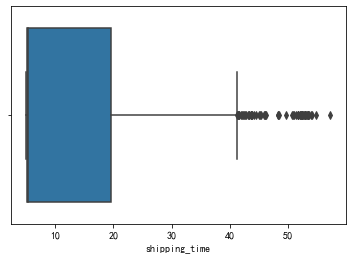

In [10]:
#查看数据分布情况
sns.boxplot(train_data['shipping_time'])

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

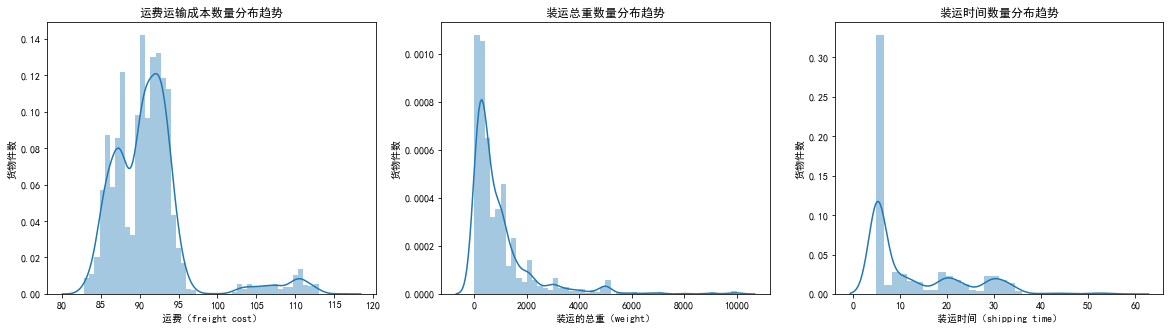

In [11]:
fig,axes=plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,5)
sns.distplot(train_data['freight_cost'],ax=axes[0])
sns.distplot(train_data['gross_weight'],ax=axes[1])
sns.distplot(train_data['shipping_time'],ax=axes[2])
axes[0].set(xlabel='运费（freight cost）',ylabel='货物件数',title='运费运输成本数量分布趋势')
axes[1].set(xlabel='装运的总重（weight）',ylabel='货物件数',title='装运总重数量分布趋势')
axes[2].set(xlabel='装运时间（shipping time）',ylabel='货物件数',title='装运时间数量分布趋势')
plt.savefig('分布趋势分析.png')


plt.show()

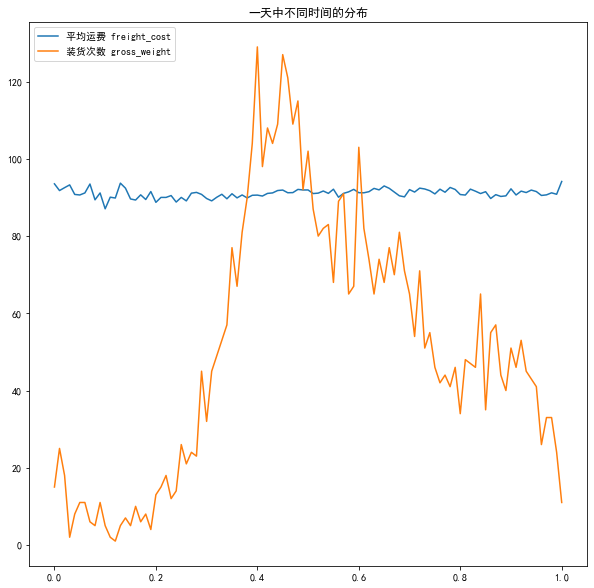

In [12]:
# train_data['hour'] = pd.to_datetime(train_data['send_timestamp']).astype(str).replace('\d{4}-\d{2}-\d{2}\s','',regex=True)
train_data['hour'] = train_data['send_timestamp'].astype(str).replace('\d{4}/\d+/\d+ ','',regex=True).replace(':\d+','',regex=True).astype("int")/24
train_data['min'] = train_data['send_timestamp'].astype(str).replace('\d{4}/\d+/\d+ ','',regex=True).replace('\d+:','',regex=True).astype("int")/60/24
train_data['time'] = (train_data['hour'] + train_data['min']).round(decimals=2)
# train_data['time']

time_mean_f = train_data.groupby(train_data.time)['freight_cost'].mean()  #一天内不同时间段的运费平均变化
time_count_g = train_data.groupby(train_data.time)['gross_weight'].count() #一天内不同时间段的装货次数

fig=plt.figure(figsize=(10,10))
plt.plot(time_mean_f,label='平均运费 freight_cost')
plt.title('一天中不同时间的分布')

# fig=plt.figure(figsize=(10,10))
plt.plot(time_count_g,label='装货次数 gross_weight')
plt.title('一天中不同时间的分布')

plt.legend(loc=2)
plt.savefig('时间趋势_day6.15.png')


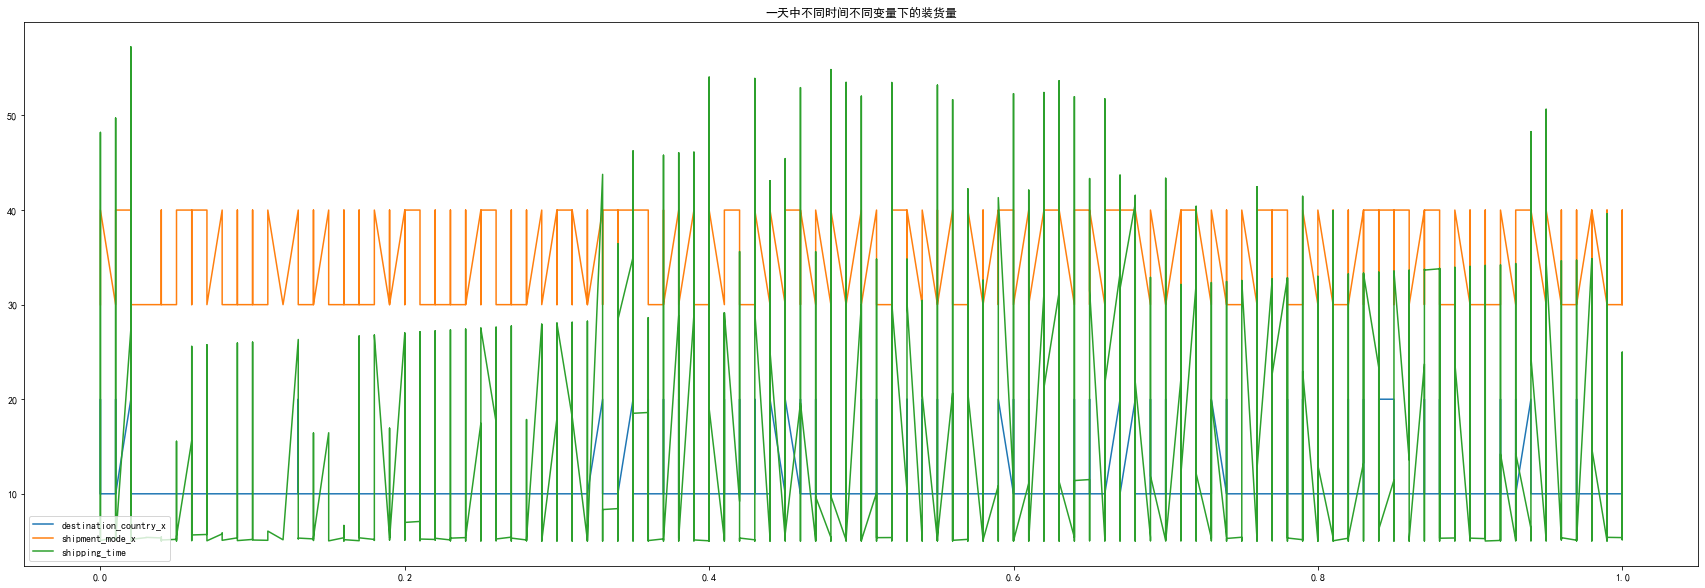

In [17]:
# train_data
train_data['destination_country_x'].replace('IN', 10, inplace=True)
train_data['destination_country_x'].replace('BD', 20, inplace=True)
train_data['shipment_mode_x'].replace('Air', 30, inplace=True)
train_data['shipment_mode_x'].replace('Ocean', 40, inplace=True)
train_data.sort_values('time',ascending=True, inplace=True)

#  time_count_dcx = train_data.groupby(train_data.time)['destination_country_x'] #一天内不同时间段的装货次数
# time_count_smx = train_data.groupby(train_data.time)['shipment_mode_x'] #一天内不同时间段的装货次数
# time_count_st = train_data.groupby(train_data.time)['shipping_time'] #一天内不同时间段的装货次数

fig=plt.figure(figsize=(30,10))
plt.plot(train_data['time'],train_data['destination_country_x'],label='destination_country_x')
plt.plot(train_data['time'],train_data['shipment_mode_x'],label='shipment_mode_x')
plt.plot(train_data['time'],train_data['shipping_time'],label='shipping_time')

plt.title('一天中不同时间不同变量下的装货量')
plt.legend(loc=3)
# plt.savefig('时间趋势_day.png')
plt.show()

### 特征处理和选择
相关性分析
各特征和装运时间变量的相关性分析

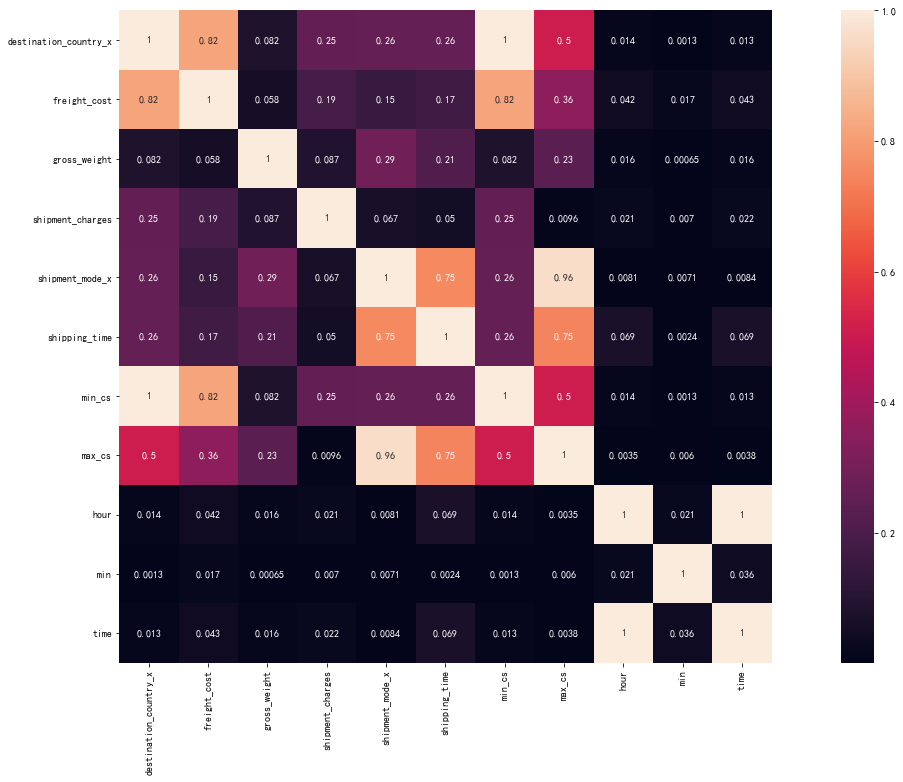

In [14]:
corr_df=train_data.corr()

corr_df1=abs(corr_df)
fig=plt.gcf()
fig.set_size_inches(25,12)
sns.heatmap(data=corr_df1,square=True,annot=True,cbar=True)
plt.savefig('特征相关.png')



划分训练集和测试集

In [15]:

# test_df=test_df.drop(drop_columns,axis=1)
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')
combined=pd.concat([train,test],ignore_index=True)
combined['date']=combined.datetime.apply(lambda x:x.split()[0])
combined['hour']=combined.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
combined['year']=combined.datetime.apply(lambda x:x.split()[0].split('-')[0]).astype('int')
combined['month']=combined.datetime.apply(lambda x:x.split()[0].split('-')[1]).astype('int')
combined['weekday']=combined.date.apply( lambda x : datetime.strptime(x,'%Y-%m-%d').isoweekday())

combined_back=combined
dummies_month = pd.get_dummies(combined['month'], prefix='month')
dummies_year = pd.get_dummies(combined['year'], prefix='year')
dummies_season = pd.get_dummies(combined['season'], prefix='season')
dummies_weather = pd.get_dummies(combined['weather'], prefix='weather')
#分开训练集和测试集
combined.columns
train_df=combined.loc[combined['count'].isnull()==False]
test_df=combined.loc[combined['count'].isnull()==True]
datetime_col=test_df['datetime']
ylables=train_df['count']
log_y=np.log(ylables)
drop_columns=['casual','count','datetime','date','registered','atemp','month','season','weather','year']
train_df=train_df.drop(drop_columns,axis=1)
test_df=test_df.drop(drop_columns,axis=1)
# #分开训练集和测试集
# train_data.columns
# train_df=train_data.loc[train_data['shipping_time'].isnull()==False]
# datetime_col=test_df['shipping_time']
# ylables=train_df['shipping_time']
# log_y=np.log(ylables)
# drop_columns=['shipment_id','send_timestamp','pick_up_point','drop_off_point','source_country','destination_country','shipment_mode','shipping_company','selected']

# test_data['destination_country_x'].replace('IN', 10, inplace=True)
# test_data['destination_country_x'].replace('BD', 20, inplace=True)
# test_data['shipment_mode_x'].replace('Air', 30, inplace=True)
# test_data['shipment_mode_x'].replace('Ocean', 40, inplace=True)

# data_drop_columns=['shipment_id','send_timestamp','shipment_charges','shipping_time']
# data_test_drop_columns=['shipment_id','send_timestamp','pick_up_point','drop_off_point','shipment_charges','shipping_time']

# data_train_df=train_data.drop(data_drop_columns,axis=1)
# data_test_df=test_data.drop(data_drop_columns,axis=1)





In [16]:
data_test_df

NameError: name 'data_test_df' is not defined

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels=log_y
x_train,x_test,y_train,y_test=train_test_split(train_df,labels,train_size=0.8)

In [67]:

# speed_null=combined[combined['s']==0]
# speed_notnull=combined[combined['shipping_time']!=0]

#用随机森林预测风速
speed_null=combined[combined['windspeed']==0]
speed_notnull=combined[combined['windspeed']!=0]
#选择特征
windspeed_trainX=speed_notnull[['destination_country_x','freight_cost','gross_weight','shipment_mode_x','shipping_company_x']]
windspeed_trainY=speed_notnull['windspeed']
windspeed_testX=speed_null[['destination_country_x','freight_cost','gross_weight','shipment_mode_x','shipping_company_x']]

解决回归问题，GridSearchCV估计器来选择最佳超参数

In [68]:
from sklearn.ensemble import RandomForestRegressor
# #Perforing grid search
from sklearn.model_selection import GridSearchCV

rf=RandomForestRegressor(random_state=10)

param1={'n_estimators':list(range(100,500,50))}
model1=GridSearchCV(estimator = rf,param_grid = param1, scoring='neg_mean_squared_error',cv=5)
model1.fit(windspeed_trainX,windspeed_trainY)
model1.best_score_
model1.best_params_
param2={'max_depth':list(range(3,10,1)),'min_samples_split':list(range(10,20,2))}
model2=GridSearchCV(estimator = RandomForestRegressor(random_state=10,n_estimators=450),param_grid = param2, scoring='neg_mean_squared_error',cv=5)
model2.fit(windspeed_trainX,windspeed_trainY)
model2.best_score_
model2.best_params_

speed_model=RandomForestRegressor(n_estimators=450,random_state=10,max_depth=9,min_samples_split=10)
speed_model.fit(windspeed_trainX,windspeed_trainY)
windspeed_testY=speed_model.predict(windspeed_testX)
combined.loc[combined.windspeed==0,'windspeed']=windspeed_testY


###  ridSearchCV进行了交叉验证法选择最优的参数，以找到正确的超参数集

In [ ]:
param_1={'n_estimators':list(range(300,1000,50))}
model_1=GridSearchCV(estimator = RandomForestRegressor(random_state=10,n_estimators=900),param_grid = param_1, scoring='neg_mean_squared_error',cv=5)
model_1.fit(x_train,y_train)
model_1.best_score_
model_1.best_params_
param_2={'max_depth':list(range(3,10,1)),'min_samples_split':list(range(10,20,2))}
model_2=GridSearchCV(estimator = RandomForestRegressor(random_state=10,n_estimators=900),param_grid = param_2, scoring='neg_mean_squared_error',cv=5)
model_2.fit(windspeed_trainX,windspeed_trainY)
model_2.best_score_
model_2.best_params_


### 得出最优参数运用到模型中

In [ ]:
model_final=RandomForestRegressor(n_estimators=900,random_state=10,min_samples_split=10,max_depth=9)
model_final.fit(x_train,y_train)
predict_final=model_final.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,predict_final)


### 产生预测结果

In [ ]:
test_pred=model_final.predict(test_df)
final_df=pd.DataFrame({'datetime':datetime_col,'count':np.exp(test_pred)})
# final_df=pd.DataFrame({'datetime':datetime_col,'shipping_time':np.exp(test_pred)})
# final_df.to_csv('result.csv')
